In [1]:
import numpy
import pandas as ps
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

In [2]:
df=ps.read_csv('IRIS.csv')
df.head()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa


In [3]:
df=df.drop(columns = ['Id'])
df.head()

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa


In [4]:
df.isnull().sum()

SepalLengthCm    0
SepalWidthCm     0
PetalLengthCm    0
PetalWidthCm     0
Species          0
dtype: int64

<Axes: >

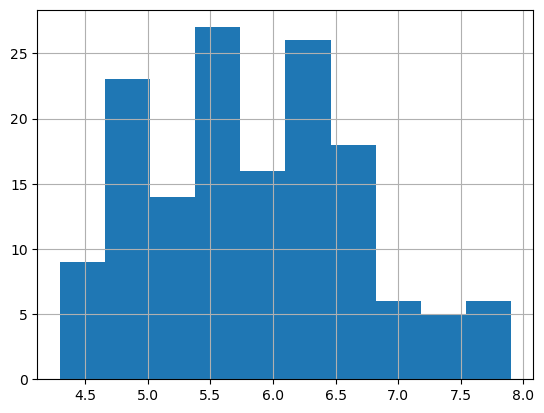

In [5]:
df['SepalLengthCm'].hist()

In [6]:
df['Species'].value_counts()

Iris-setosa        50
Iris-versicolor    50
Iris-virginica     50
Name: Species, dtype: int64

In [7]:
df.isnull().sum()

SepalLengthCm    0
SepalWidthCm     0
PetalLengthCm    0
PetalWidthCm     0
Species          0
dtype: int64

<Axes: >

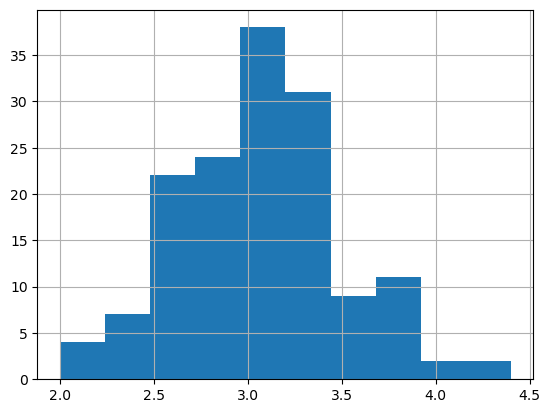

In [8]:
df['SepalWidthCm'].hist()

<Axes: >

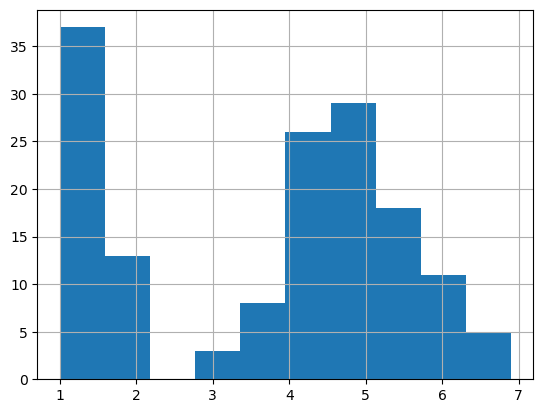

In [9]:
df['PetalLengthCm'].hist()

<Axes: >

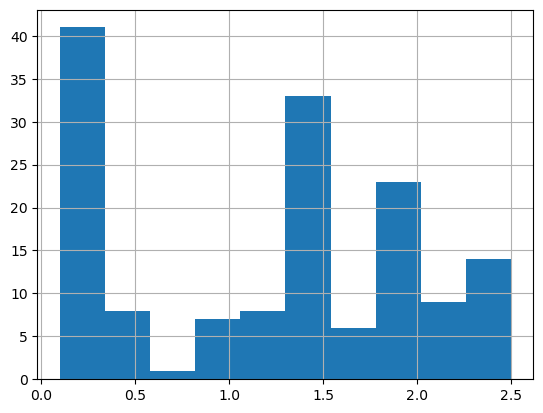

In [10]:
df['PetalWidthCm'].hist()

In [11]:
colors=['red','yellow','blue']
species=['Iris-setosa','Iris-versicolor','Iris-virginica']

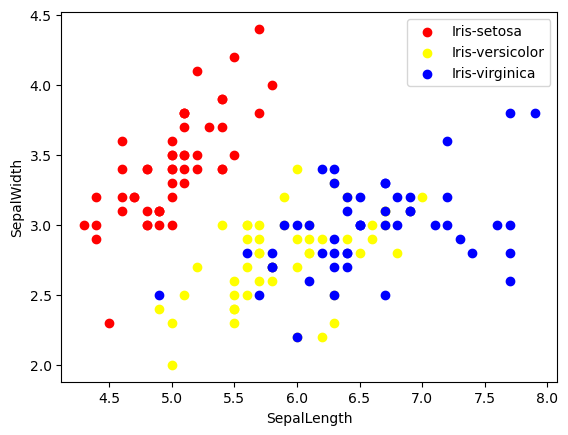

In [12]:
for i in range(3):
    x=df[df['Species']==species[i]]
    plt.scatter(x['SepalLengthCm'],x['SepalWidthCm'],c=colors[i],label=species[i])
plt.xlabel("SepalLength")
plt.ylabel("SepalWidth")
plt.legend()

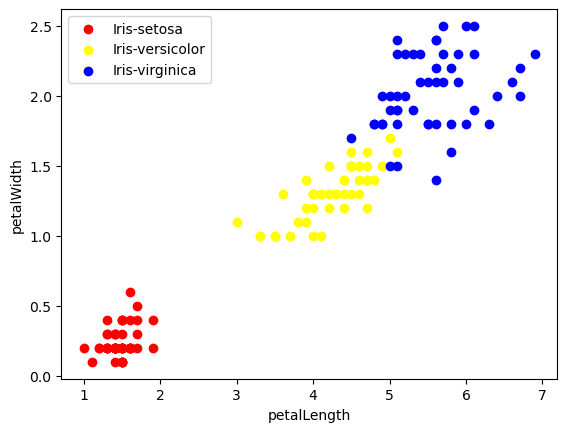

In [13]:
for i in range(3):
    x=df[df['Species']==species[i]]
    plt.scatter(x['PetalLengthCm'],x['PetalWidthCm'],c=colors[i],label=species[i])
plt.xlabel("petalLength")
plt.ylabel("petalWidth")
plt.legend()

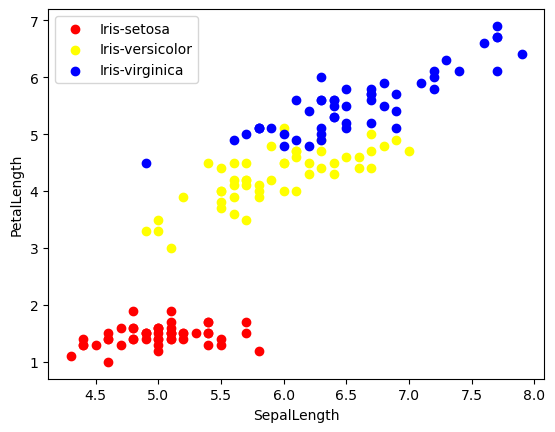

In [14]:
for i in range(3):
    x=df[df['Species']==species[i]]
    plt.scatter(x['SepalLengthCm'],x['PetalLengthCm'],c=colors[i],label=species[i])
plt.xlabel("SepalLength")
plt.ylabel("PetalLength")
plt.legend()

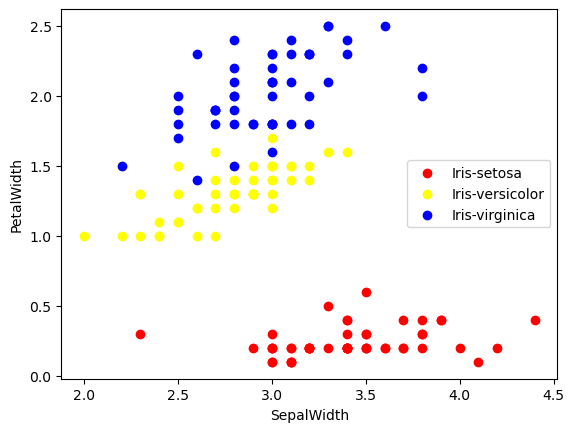

In [15]:
for i in range(3):
    x=df[df['Species']==species[i]]
    plt.scatter(x['SepalWidthCm'],x['PetalWidthCm'],c=colors[i],label=species[i])
plt.xlabel("SepalWidth")
plt.ylabel("PetalWidth")
plt.legend()

In [16]:
df.corr()

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm
SepalLengthCm,1.000000,-0.109369,0.871754,0.817954
SepalWidthCm,-0.109369,1.000000,-0.420516,-0.356544
PetalLengthCm,0.871754,-0.420516,1.000000,0.962757
PetalWidthCm,0.817954,-0.356544,0.962757,1.000000


<Axes: >

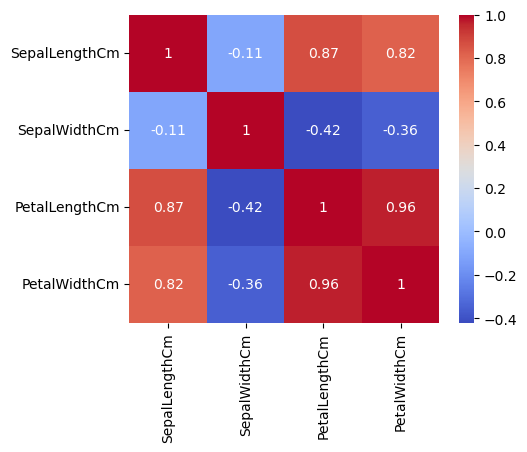

In [17]:
corr=df.corr()
fig,ax=plt.subplots(figsize=(5,4))
sns.heatmap(corr,annot=True,ax=ax,cmap='coolwarm')

In [18]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
import pickle

In [19]:
X=df.drop(columns =['Species'])
Y=df['Species']

In [20]:
x_train,x_test,y_train,y_test=train_test_split(X,Y,train_size=0.30)

In [21]:
model=LogisticRegression()
model.fit(x_train,y_train)

LogisticRegression()

In [22]:
print('logistic Regression accuracy',model.score(x_test,y_test)*100)

logistic Regression accuracy 93.33333333333333


In [23]:
model=KNeighborsClassifier()
model.fit(x_train,y_train)
print('KNN accuracy',model.score(x_test,y_test)*100)

KNN accuracy 97.14285714285714


In [24]:
model=DecisionTreeClassifier()
model.fit(x_train,y_train)
print('tree accuracy',model.score(x_test,y_test)*100)

tree accuracy 94.28571428571428


In [25]:
filename='saved_model.sav'
try:
    with open(filename,'wb') as file:
        pickle.dump(model,file)
        print('model saved successfully')
except Exception as e:
    print('error in saving model',e)

model saved successfully


In [26]:
load_model=pickle.load(open(filename,'rb'))

In [27]:
load_model.predict([[6,2.2,4.0,1.0]])

array(['Iris-versicolor'], dtype=object)

In [28]:
load_model.predict([[4,3,1,5]])

array(['Iris-virginica'], dtype=object)